# Zrozumienie danych

W uczeniu maszynowym najwazniejsze sa dane. Wazne jest aby gdy to mozliwe zwiekrzac ilosc danych oraz je wyczyscic. **Poznanie danych wymaga zrozumienia postawionego problemu.**

Uzyskujemy dane osob z katastrofy titanica. Zmienne dziela sie na numeryczne oraz kategoryczne. Zmienne numeryczne dzieli sie na dyskrtne (te o skonczonym zbiorze wartosci) oraz ciagle (te o nieskonczonym zbiorze wartosci).


Aby ocenic rodzaj zmiennych nalezy rozumiec jej znaczenie.

- zmienna PassegerID jest zmienna numeryczna ciagla.
- zmienna Survived jest zmienna numeryczna dyskretna (bool)
- zmienna Pclass jest zmienna numeryczna dyskretna; powinna byc traktowana jako przodkowa zmienna kategoryczna.
- zmienna name jest regularna zmienna kategoryczna.
- zmienna sex

# Zmienne numeryczne

Rozklad wartosci zmiennych numerycznych opisuje dziesiec najwazniejszych statystyk opisowych:

- miejsce najwiekrzej koncentracji wartosci opisuja miary tendencji centralnej: mediana, srednia arytmetyczna i dominanta
- zroznicowanie wartosci opisuja miary rozproszenia (dyspersji): rozstep, rozstep cwiartkowy (odchylenie), wariancja, odchylenie standardowe i wspolczynnik zmiennosci.
- porownanie ksztaltu rozkladu zmiennej z rozkladem normalnym umozliwiaja miary symetrii rozkladu: skosnosc i kurtoza


### Miary tendencji centralnej

Centralny punkt dystrybucji wartosci czesto opisuje sie za pomoca sredniej arytmetycznej. Aby ja obliczyc, nalezy zsumowac wszystkie wartosci zmiennej i otrzymany wynik podzielic przez liczbe przykladow.

Druga miara tendencji centralnej jest dominanta. Wskazuje ona na najczesciej wystepujaca wartosc, lub wartosci, zmiennej. Zmienne o jednej dominancie maja rozklad jednomodalny. Zmienne o dwoch dominantach maja rozklad dwumodalny.

Trzecia miara tendencji centralnej jest mediana. Dzieli ona uszeregowany zbior wartosci na pol, czyli ponizej i powyzej mediany znajduje sie 50% wszystkich wartosci. Mediane oznacza sie symbolem $Me$. Jezeli liczba przykladow $n$ jest nieparzysta:
$$Me = \frac{x_n + 1}{2} $$

czyli jest rowna wartosci przykladu bedacego posrodku uporzadkowanej listy. Jezeli jest parzysta to:
$$Me = \frac{1}{2}(x_{n/2} + x_{\frac{n+1}{2}})$$

Mediana jest tez nazywana drugim kwartylem. Uzywa sie rowniez pierwszego oraz trzeciego kwartyla, ktore dziela zbior na 25% i 75%.

### Miary rozproszenia

Miary tendencji centralnej pozwalaja wyznaczyc punkty najwiekrzej koncentracji. Miary rozproszenia pozwalaja okreslic jak bardzo wartosci zmiennej sa rozrzucone wokol tych punktow.

Najprostsza miara rozproszenia jest rozstep czyli roznica miedzy najwiekrza a najmniejsza wartoscia. Oznacza sie symbolem:

$$R = x_{max} - x_{min}$$

# Rozklad normalny

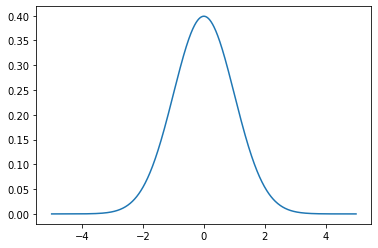

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def normal(x, sigma, me):
    return (1/(sigma * np.sqrt(2*np.pi))) * np.e ** (-0.5 * ((x-me)/sigma)**2 )

x = np.linspace(-5, 5, 1000)

plt.plot(x, normal(x, 1, 0))

Odleglosc miedzy pierwszy a trzecim kwartylem to **rozstep cwiratkowy**.


Najczesciej uzywanymi miarami rozproszenia sa wariancja i odchylenie standardowe. Obie sa obliczone na podstawie odchylen. Odchylenie to roznica miedzy wartoscia przykladu a wartoscia srednia. **Wariancja** to suma kwadratow odchylen wynikow od sredniej podzielona przez liczbe wynikow minus jeden. Wariancje oznaczamy symbolem:

$$\sigma^2 = \frac{\sum (x_i - \bar{x})}{n-1}$$

Poniewaz wartosci wariancji sa wyrazone w jednostkach kwadratowych, czesciej uzywana miara rozproszenia jest odchylenie standardowe, czyli pierwiastek kwadratowy z wariancji

$$\sigma = \sqrt{\sigma^2} $$

Dzielac odchylenie standardowe przez srednia arytmetyczna i mnozac otrzymany wynik przez 100, otrzymamy wspolczynnik zmiennosci:

$$Vs = \frac{\sigma}{X} * 100\% $$

## Miary symetrii rozkladu

### Skosnosc

Wiele zmiennych ma rozklad zblirzony do normalnego lecz rzadko jest on idealnie normalny. Porownojac srednia z dominanta mozemy z pewna dokladnoscia okreslic asymetrie rozkladu wartosci. Miara tego odchylenia jest skosnosc. Skosnosc oznaczamy symbolem:

$$W_s = \overline{x} - D$$

Jezeli srednia arytmetyczna jest wiekrza od dominanty, to wartosci powyzej sredniej wystepuja czesciej niz wynikaloby to z rozkladu normalnego, mamy wtedy doczynienia z rozkladem prawoskosnym. W przeciwnym wypadku mamy do czynienia z lewoskosnym.

**Wspolczynnik skosnosci oprocz kierunku asymetrii wskazuje jego sile**, wartosci blizsze zeru maja slabsza asymetrie.

$$A_s = \frac{W_S}{S} $$

### Kurtoza

W rozkladzie normalnym wartosc tej miary, mierzacej poziom zageszczenia wokol wartosci centralnej, wynosi 0.

$$\beta_2 = \frac{u_4}{s^4} $$

gdzie $u_4$ jest czwartym momentem centralnym. Jezeli kurtoza jest mniejsza od 0 to mamy do czynienia z rozkladem splaszczonym, a wiec wartosci zmiennej beda bardziej zroznicowane. Jezeli jest wiekrza od zera, to mamy do czynienia z rozkladem wysmuklym, czyli zmienna czesciej bedzie przyjmowala wartosci zblizone do sredniej.

Za odstajace wartosci (**outliners**) przyjmuje sie wartosci oddalone o wiecej niz dwukrotnosc rozstepu cwiartokwego od sredniej arytmetycznej. **Miara tendencji centralnej zalezna od wartosci odstajacych jest srednia, a miara rozproszenia rozstep i odchylenie standardowe.**

# Rozklad normalny

Jezeli odchylenie standardowe jest rowne 1 oraz wartosc srednia jest rowna 0 to mamy do czynienia z standardowym rozkladem normalnym. Mozemy zastosowac proces standaryzacji zmiennej czyli odjecie warotsci sredniej oraz podzielenia przez odchylenie standardowe.

**Ustandaryzowana zmienna mozna opisac statystyka z-score**, mozna ja interpretowac jako miare odstawania - im wiekrze Z-score, tym bardziej odstajaca wartosc. Czyli wartosci o wiekrzym Z-score sa bardziej nietypowe.

Sprawdzajac te wartosc w tabeli rozkladu zmiennej losowej lub uzywajac odpowiedniej funkcji otrzymamy kwantyl rzedu jej wystapienia.

In [4]:
import scipy.stats as st

data = np.array([0.45, 92, 23, 45, 29, 9])

print("Z-score dla wartosci z listy: ", st.zscore(data))
print("Prawdopodobienstwo wystapienia 0.45 w naszym zbiorze: ", 1 - st.norm.cdf(data[0]))

Z-score dla wartosci z listy:  [-1.08987724  1.96846027 -0.33656745  0.39836892 -0.13613026 -0.80425424]
Prawdopodobienstwo wystapienia 0.45 w naszym zbiorze:  0.32635522028791997


### Jak sprawdzic normalnosc rozkladu zmiennej

Duza czesc testow zaklada pewien rozklad zmiennych. Jezeli zmienna ma rozklad zblizony do normalnego, mozemy uzyc testow parametrycznych. Uzywa sie do tego wykresu kwantyl-kwantyl lub porownuje sie histogram zmiennej do rozkladu normalnego.

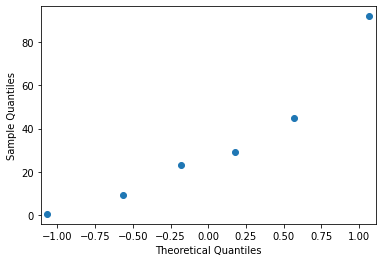

In [5]:
import statsmodels.api as sm

sm.qqplot(data)
plt.show()

Normal distribution test

In [6]:
data_no_missing = data.dropna()
stat, p = st.shapiro(data_no_missing)

alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

# Zmienne kategoryczne

Rozklad zmiennych kategorycznych ocenia sie za pomoca tabel czestosci oraz histogramow. Tabel czestosci zawiera zliczone czestoci wystepowania poszczegolnych stanow zmiennej, na przyklad liczbe pasazerow, ktorzy zaokretowali sie w poszczegolnych portach. Pozwalaja tez sprawdzic ile stanow przyjmuje zmienna kategoryczna, oraz czy wszystkie stany sa poprawne.

In [ ]:
import pandas as pd

print(pd.crosstab(index=data["Embarked"], columns="Count"))

Tabele czestosci moga zawierac puste dane.

In [ ]:
print(data.Embarked.isnull().sum())

# Entropia

Entropia to miara informacji zawartej w zmiennej. Zmierzenie entropii zmiennej pozwala ocenic jej przydatnosc dla modeli uczenia predykcyjnego.